# ID5059 Assignment 2: Credit Card Fraud Detection

The following code will be split in 5 sections:
>- 1: Introduction
>- 2: Preparation of the data for our ML algorithms
>- 3: Selection of the models, training and fine-tuning
>- 4: Evaluation of the models
>- 5: Presentation of the solution (report)

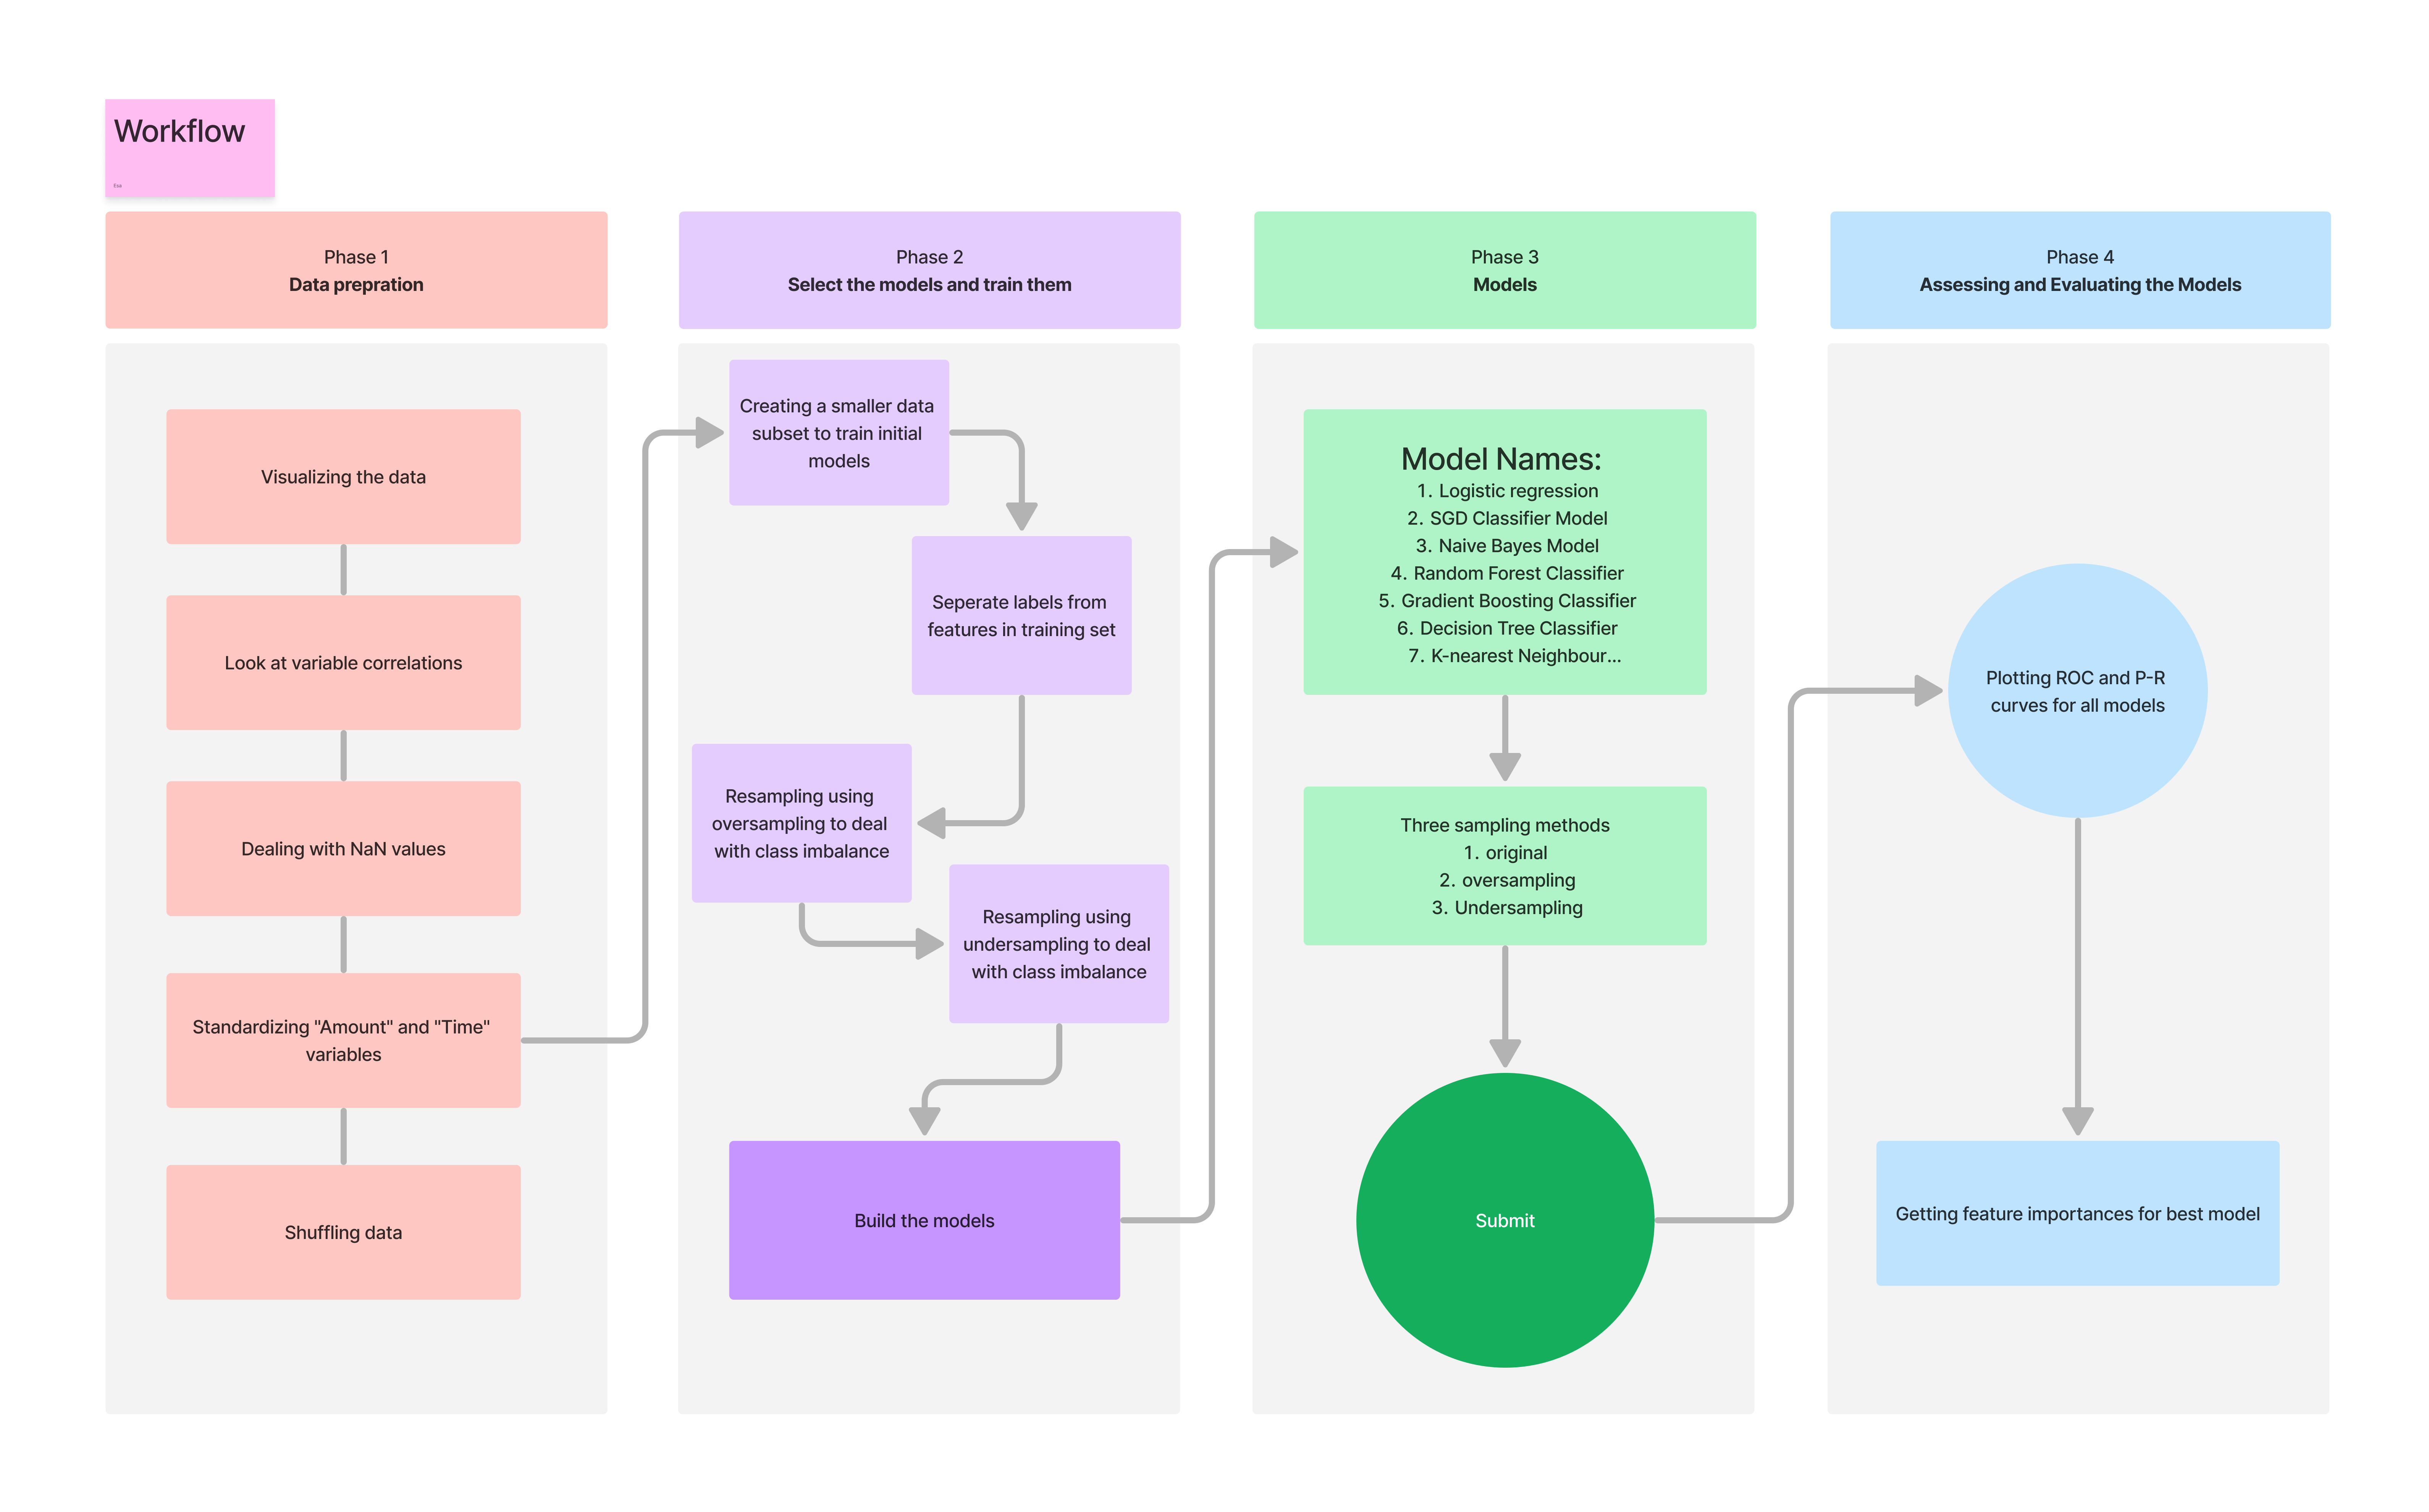

## Part 1: Introduction
Our client has recently discovered serious credit card fraud in its systems. With the following code and attached report, our aim is to present a solution to predict fraudulent credit card transactions from the data provided. All transactions occurred over a period of two days. 

This synthetic data is almost identical to the Credit Card Fraud Detection dataset on Kaggle.com. It is of paramount importance that credit card companies are able to detect fraudulent activity in order to intervene and block cards that may have been stolen. This is critical to prevent customers from being charged for items they did not purchase.

Data source: https://www.kaggle.com/competitions/playground-series-s3e4/data

In [70]:
# Load relevant libraries and packages
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import io
import matplotlib.patches as mpatches
import pickle
!pip install imbalanced-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from statistics import mode, mean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Step 1.1: Parse the Data

- Following is the instruction on how to upload the data sets to Google Colab from your local drive.

- First upload the files to your google drive and then mount the drive to this colab file, so that you can access your google files as if it is on your local drive.

In [ ]:
# The following code assumes the path of the files in your google drive is /content/drive/MyDrive/test.csv and /content/drive/MyDrive/train.csv
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load two csv files to two Pandas dataframes
train_df = pd.read_csv('/content/gdrive/MyDrive/train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/test.csv')

In [ ]:
# Show all columns of Pandas DataFrame (previously limited to 20 columns)
pd.set_option("display.max_columns", None)

In [ ]:
train_df.describe(include="all")

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,219128.000000,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,15.878405,9.417789,5.406614,5.976265,6.078453,4.693323,5.834992,8.845303,4.847887,4.090974,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [ ]:
# Test whether the parsing is successful
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

- All variables are standardised numeric variables. This makes building the models easier but makes the interpretation more challenging.

## Part 2: Explore, Clean and Prepare the Data

In order to reach a deeper understanding of the data, we will look at the variables' distributions individually, as well as their correlation with the 'Class' variable. Furthermore, we will impute all missing (NaN) values using three seperate methods - mean, median, and most frequent. Instead of choosing only one of these, we employ more robust methodology by looking at the distribution of each variable and imputing the median if it is long-tailed and the mean if it is fairly symmetrical. 

Since the data is already normalised, we do not have to consider normalising the variables except for "Time" and "Amount". Furthermore, since theere are no variable names, we cannot experiment with attribute combinations. In addition, we will shuffle the data before building any models to make sure any possible ordering will be negated.

### Step 2.1: Visualise the Data

In [ ]:
# Use ggplot as the main style for plots
plt.style.use('ggplot')

In [ ]:
# Create a data set to use for visualisations
train_data_vis = train_df.copy()

# Create a new categorical variable based on the above conditions (low, low-med, med, med-high, high)
train_data_vis["Cat_amount"] = pd.cut(train_data_vis["Amount"], bins = [0, 10, 200, float("Inf")], labels = ["low", "med", "high"])

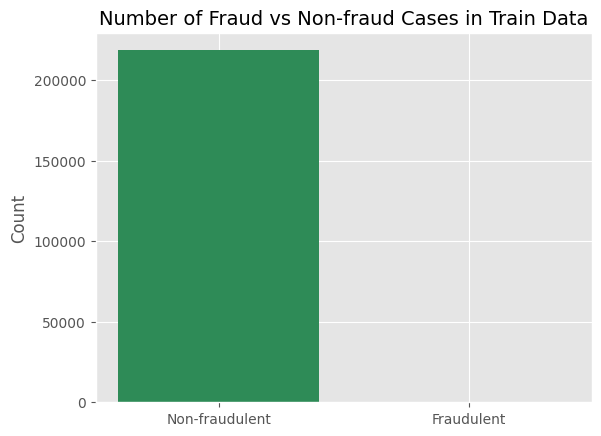

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualise relative of numbers of instances in each class
categories = ['Non-fraudulent', 'Fraudulent']
values = [len(train_data_vis[train_data_vis.Class==0]), len(train_data_vis[train_data_vis.Class==1])]
plt.bar(categories, values, color=['seagreen', 'crimson'])
plt.ylabel('Count')
plt.title("Number of Fraud vs Non-fraud Cases in Train Data", fontsize=14)
plt.show()
plt.savefig("Class_comparison.png")

- Here we can see that the dataset is highly imbalanced - fraud cases only represent about 0.17% of the data set. This presents an issue when training the data as the likelihood of non-fraud is much higher, thereby making the model biased. Given this class imbalance ratio, the accuracy will be measured using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

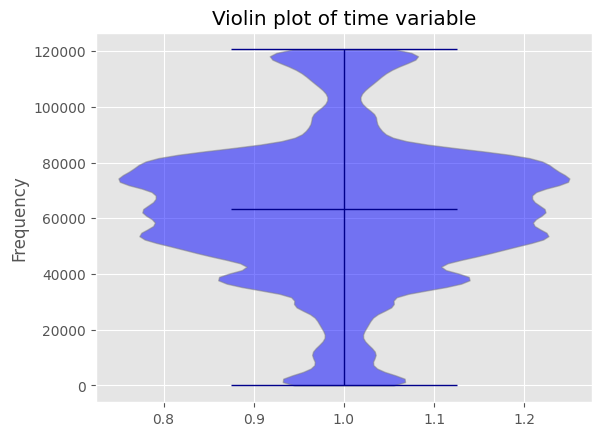

In [ ]:
# Create violin plots from 'Amount' and 'Time' variables
amount = train_data_vis["Amount"]
time = train_data_vis["Time"]

violin_parts = plt.violinplot(time, showmedians=True, showextrema = True)
plt.title("Violin plot of time variable")
plt.ylabel("Frequency")

for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor("darkblue")
    vp.set_linewidth(1)
# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor("blue")
    vp.set_edgecolor("gray")
    vp.set_linewidth(1)
    vp.set_alpha(0.5)

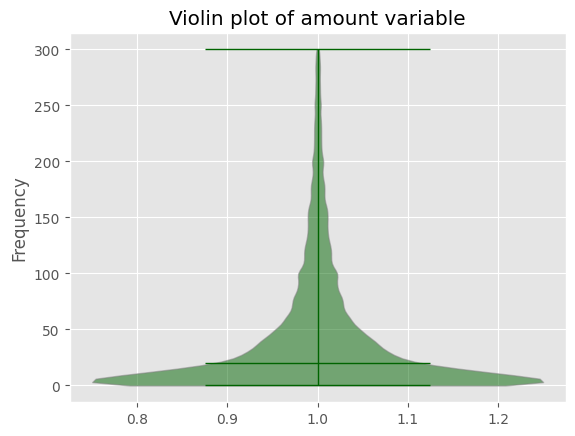

In [ ]:
# Create violin plot for 'Amount' variable
amount_lim = amount[amount<300]
violin_parts = plt.violinplot(amount_lim, showmedians=True)
plt.title("Violin plot of amount variable")
plt.ylabel("Frequency")

for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor("darkgreen")
    vp.set_linewidth(1)

for vp in violin_parts['bodies']:
    vp.set_facecolor("darkgreen")
    vp.set_edgecolor("gray")
    vp.set_linewidth(1)
    vp.set_alpha(0.5)

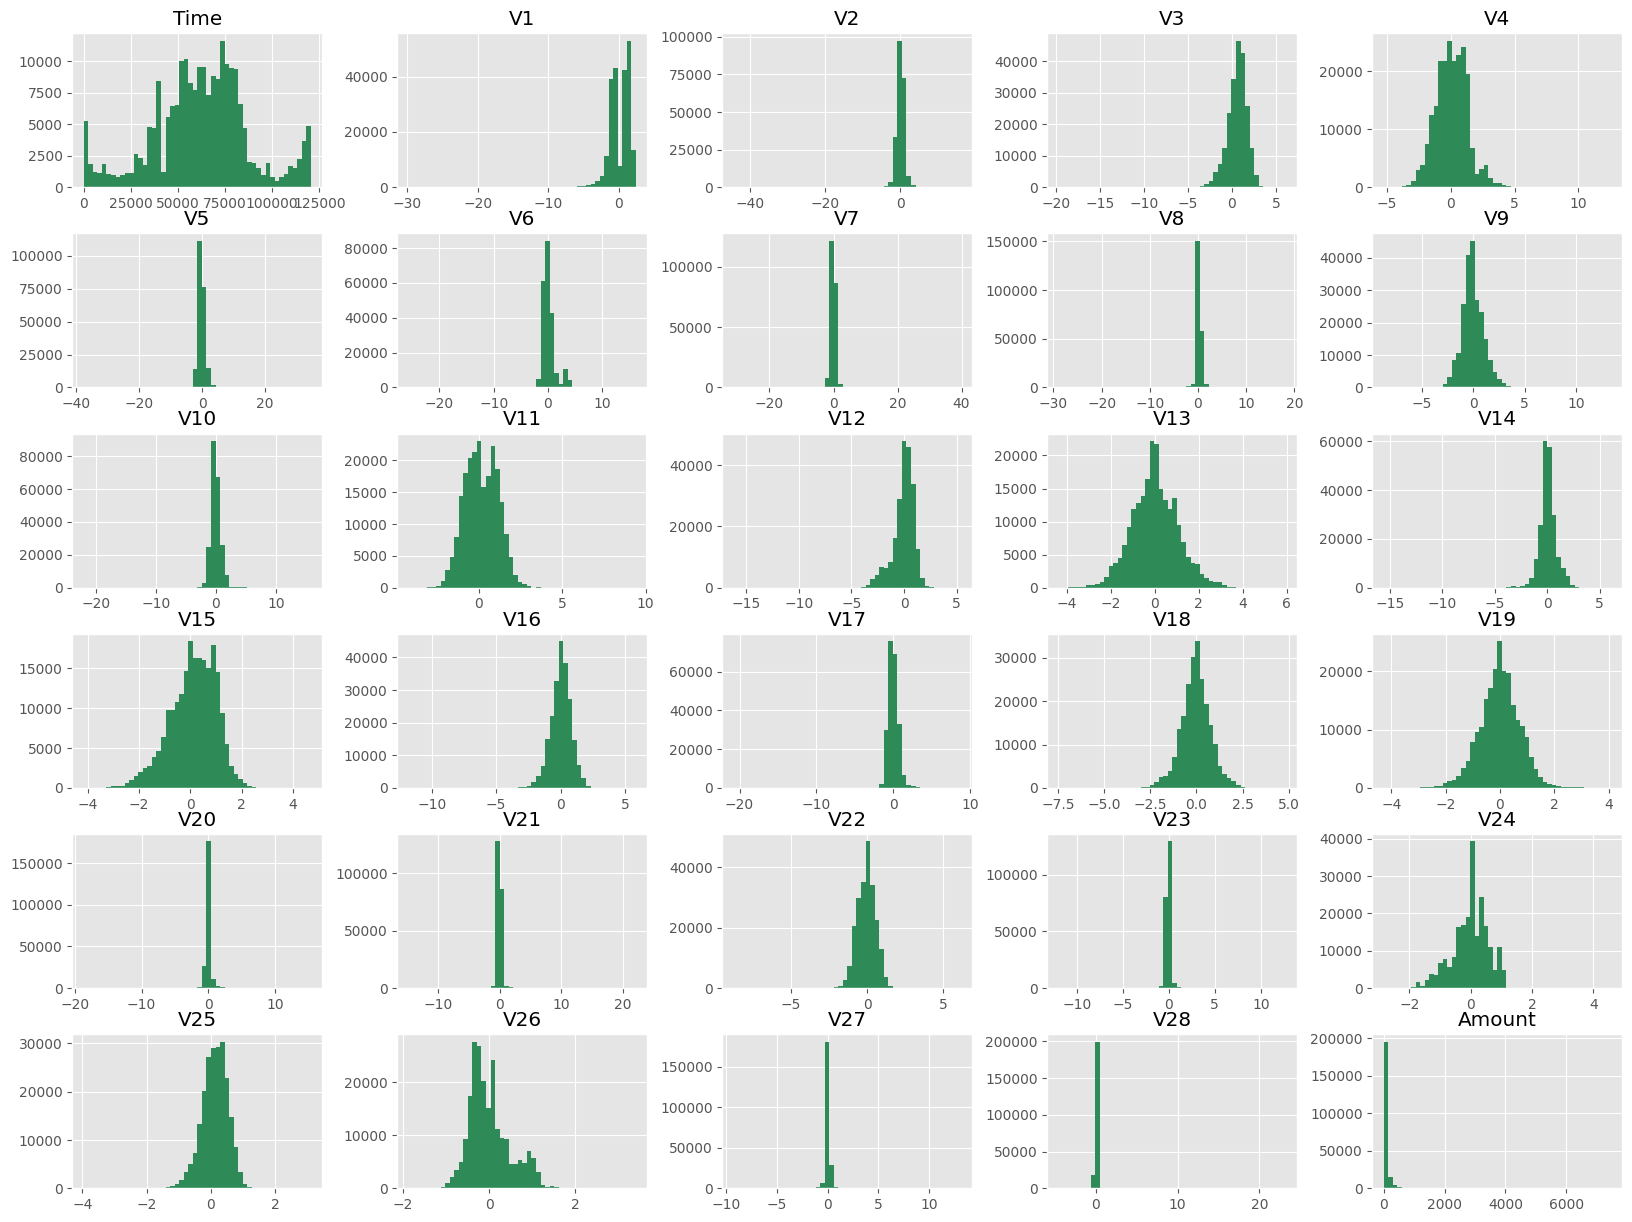

In [ ]:
# Visualise all attributes' distributions
%matplotlib inline 
import matplotlib.pyplot as plt
train_df_numeric = train_df.drop(['id','Class'], axis=1)
train_df_numeric.hist(bins=50, figsize=(20,15), color="seagreen")
plt.show()

- The majority of the attributes' distributions show close approximation to Normality, with only a few being significantly skewed, e.g. V1, V12, V26.

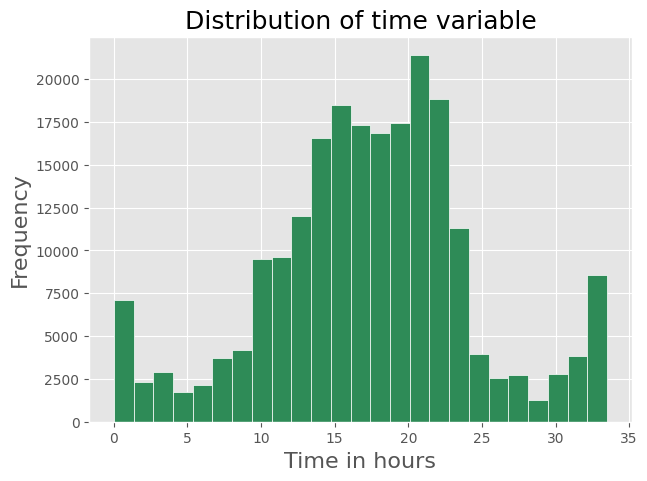

In [ ]:
# Further examine 'Time' variable distribution with histogram
plt.figure(figsize=(7,5))
plt.hist(train_data_vis["Time"]/3600, color = "seagreen", ec="white", bins=25)
plt.xlabel("Time in hours", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Distribution of time variable", fontsize=18)
plt.savefig("Distribution of time.png")

- The credit card transactions occured in a 2-day (35-hour) time period, where the time in this case is measured in seconds. The time variable in seconds was converted into hours, from which it becomes clear that all transactions occured in approximately a 34-hour window. Most transactions occured between the 14th and the 22nd hours.

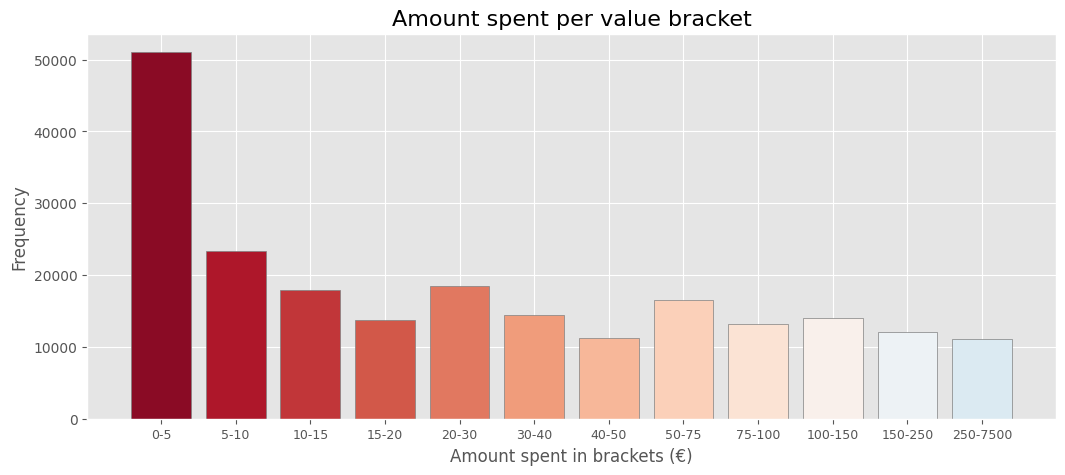

In [ ]:
# Visualise the amount spent for each transaction per value bracket
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-75", "75-100", "100-150", "150-250", "250-7500"]
values = [51046, 23343, 17948,13735,18451,14456,11306,16542,13220,13977,12118,11141]

colors = sns.color_palette("RdBu", 20)

plt.figure(figsize=(12.5,5))
plt.bar(labels, values, color = colors, ec="gray")
plt.xticks(fontsize=9)
plt.title("Amount spent per value bracket", fontsize=16)
plt.xlabel("Amount spent in brackets (€)")
plt.ylabel("Frequency")
plt.savefig("amount spent per value bracket")

Text(0.5, 1.0, 'Highest transaction volume in middle of time sample')

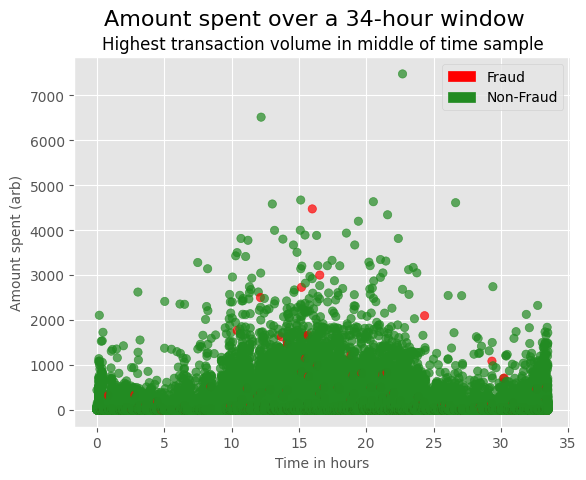

In [ ]:
# Look closer at the relationship of 'Amount' and 'Time'
amount = train_data_vis["Amount"]
time = train_data_vis["Time"]
Class = train_data_vis["Class"]

## Set colors and zorder based on Class value
colors = ["forestgreen" if c == 0 else "red" for c in Class]
#zorder = [5 if c == 1 else 0 for c in Class]

## Plot scatter plot with color-coded Class variable
plt.scatter(time/3600,amount, color=colors, alpha=0.7)

## Add legend
fraud_patch = mpatches.Patch(color='red', label='Fraud')
non_fraud_patch = mpatches.Patch(color='forestgreen', label='Non-Fraud')
plt.legend(handles=[fraud_patch, non_fraud_patch])

## Add labels and titles
plt.xlabel("Time in hours", fontsize=10)
plt.ylabel("Amount spent (arb)", fontsize=10)
plt.suptitle("Amount spent over a 34-hour window", fontsize=16)
plt.title("Highest transaction volume in middle of time sample", fontsize=12)

In [ ]:
# Select only fraud cases from data set
train_data_vis_fraud = train_data_vis[train_data_vis['Class'] == 1]

Text(0.5, 1.0, 'Highest transaction volume in middle of time sample')

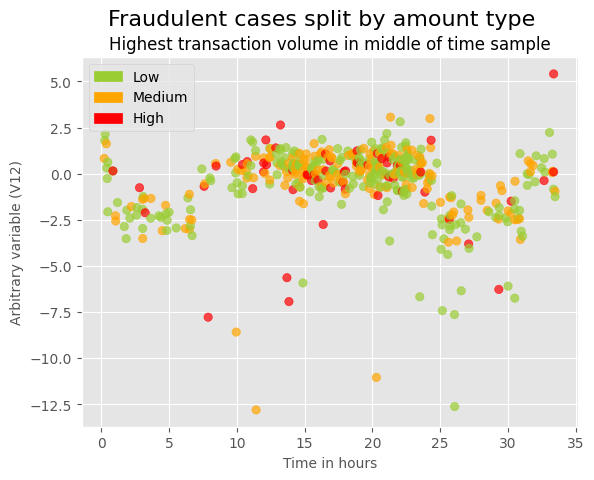

In [ ]:
# Look closer at the relationship of 'Amount' and 'Time'
amount_fraud = train_data_vis_fraud["Amount"]
time_fraud = train_data_vis_fraud["Time"]
Class_fraud_cat = train_data_vis_fraud["Cat_amount"]
var12 = train_data_vis_fraud["V12"]
var20 = train_data_vis_fraud["V20"]
var25 = train_data_vis_fraud["V24"]
var2 = train_data_vis_fraud["V2"]

## Set colors and zorder based on Class value
colors = ["yellowgreen" if c == "low" else "orange" if c == "med" else "red" for c in Class_fraud_cat]

## Plot scatter plot with color-coded Class variable
plt.scatter(time_fraud/3600,var12, color=colors, alpha=0.7)

## Add legend
low_patch = mpatches.Patch(color='yellowgreen', label='Low')
med_patch = mpatches.Patch(color='orange', label='Medium')
high_patch = mpatches.Patch(color='red', label='High')
plt.legend(handles=[low_patch, med_patch, high_patch])

## Add labels and titles
plt.xlabel("Time in hours", fontsize=10)
plt.ylabel("Arbitrary variable (V12)", fontsize=10)
plt.suptitle("Fraudulent cases split by amount type", fontsize=16)
plt.title("Highest transaction volume in middle of time sample", fontsize=12)

Text(0.5, 1.0, 'Highest transaction volume in middle of time sample')

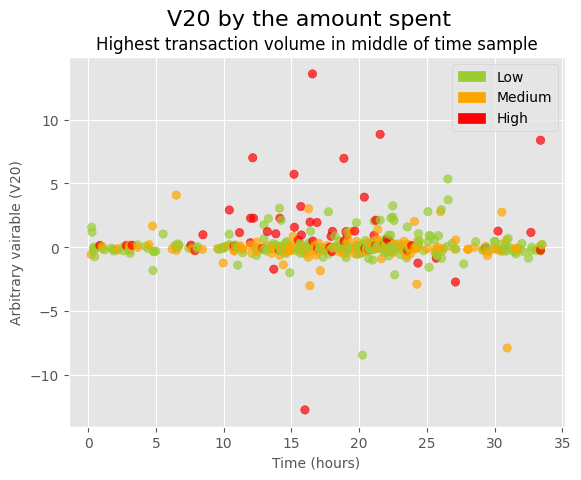

In [ ]:
# Look closer at the relationship of 'V20' and 'Time'
amount_fraud = train_data_vis_fraud["Amount"]
Class_fraud_cat = train_data_vis_fraud["Cat_amount"]
time_fraud = train_data_vis_fraud["Time"]
var20 = train_data_vis_fraud["V20"]

#3 Set colors and zorder based on Class value
colors = ["yellowgreen" if c == "low" else "orange" if c == "med" else "red" for c in Class_fraud_cat]

#3 Plot scatter plot with color-coded Class variable
plt.scatter(time_fraud/3600, var20, color=colors, alpha=0.7)

#3 Add legend
low_patch = mpatches.Patch(color='yellowgreen', label='Low')
med_patch = mpatches.Patch(color='orange', label='Medium')
high_patch = mpatches.Patch(color='red', label='High')
plt.legend(handles=[low_patch, med_patch, high_patch])

## Add labels and titles
plt.xlabel("Time (hours)", fontsize=10)
plt.ylabel("Arbitrary vairable (V20)", fontsize=10)
plt.suptitle("V20 by the amount spent", fontsize=16)
plt.title("Highest transaction volume in middle of time sample", fontsize=12)

### Step 2.2: Investigate Variable Correlations

<Axes: >

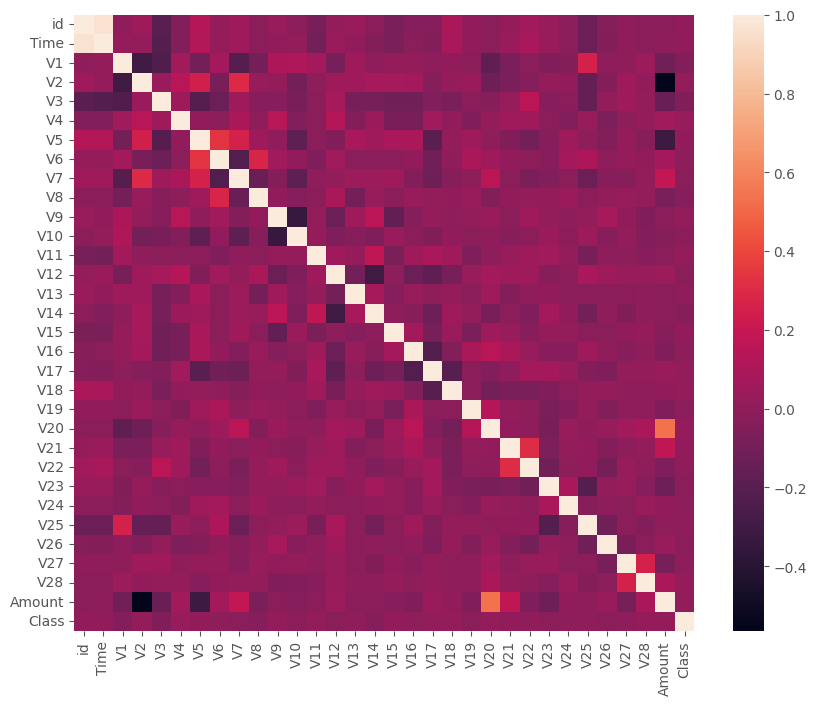

In [ ]:
# Plot correlation between attributes
corr_mat = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat)

- The correlation plot shows that none of the numerical attributes is very correlated with the Class attribute as all their values lie close to 0.

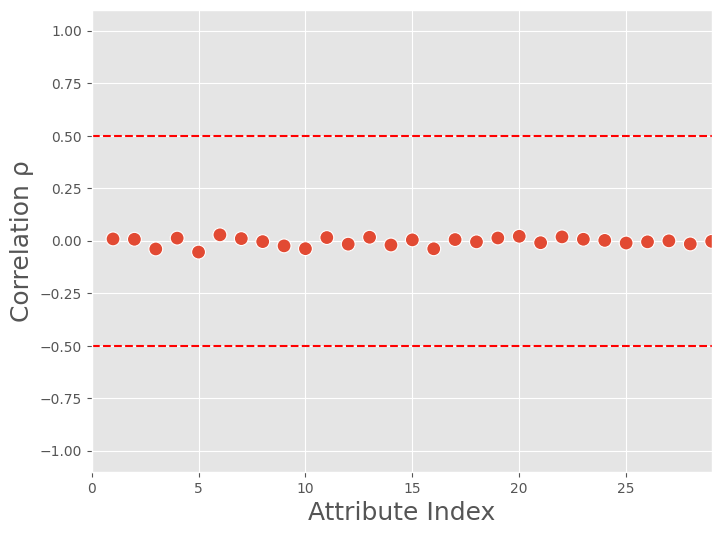

In [ ]:
# Plot correlations with 'Class'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.linspace(1,len(corr_mat.Class),len(corr_mat.Class)), y=corr_mat.Class, legend=None, s=100, style=abs(corr_mat.Class)>0.5)
plt.axis([0,29,-1.1,1.1])
plt.xlabel("Attribute Index", fontsize=18)
plt.ylabel("Correlation \u03C1", fontsize=18)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=-0.5, color='r', linestyle='--')
plt.show()

<Axes: >

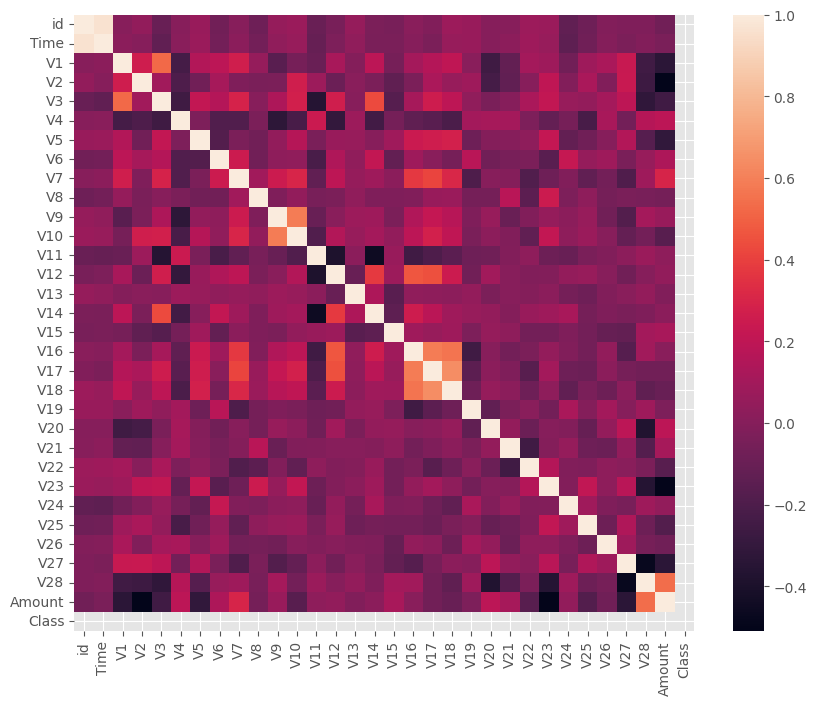

In [ ]:
# Plot correlations between attributes for the subset of fraudulent features
train_df_fr = train_df[train_df.Class==1]
corr_mat_fr = train_df_fr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat_fr)

In [ ]:
# Obtain numerical correlations
correlations = train_df.corr()
correlations_list = correlations["Class"].sort_values(ascending=False)
correlations_list

Class     1.000000
V4        0.027977
V18       0.021058
V28       0.019134
V20       0.018148
V11       0.016485
V9        0.015108
V17       0.013010
Amount    0.012909
V2        0.012451
V5        0.010144
id        0.008551
V21       0.006951
Time      0.006889
V15       0.005546
V13       0.004011
V22       0.001579
V25      -0.000648
V27      -0.003014
V6       -0.004217
V24      -0.005328
V16      -0.005357
V19      -0.009408
V23      -0.010955
V26      -0.015361
V10      -0.016393
V12      -0.020393
V7       -0.024589
V8       -0.037774
V14      -0.038398
V1       -0.039251
V3       -0.054008
Name: Class, dtype: float64

- From the above correlations, we can see that there aren't many strong correlations (in either directions) with the class outcome variable.

In [ ]:
# Obtain proportion of significant correlations
(abs(correlations) > 0.5).sum().sum()/len(correlations.unstack())

0.037109375

- Only 3.7% of all the pairwise correlations between the variables in the data set are significant (above 0.5)


### Step 2.3: Deal with Missing Values

In [ ]:
# Count number of missing values
nan_count = train_df.isna().sum()
print(nan_count/len(train_df)) #printing NaN %

id        0.0
Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


- Here we can see that there are no missing values in the data set. To still be able to test our three imputation methods specified in the course spec sheet, we will randomly remove variables and then test our three methods with our final model to see which yields a better result.

Step 1: Split training and test sets

In [ ]:
# Assign explanatory variable columns as features
X = train_df.drop("Class", axis=1)

# Assign 'Class' as labels 
Y = train_df['Class'].copy()

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

Step 2: Randomly remove data


In [ ]:
# Remove random observations via logical Pandas dataframe with 1% of TRUEs (NaNs)
nan_mat_train = np.random.random(X_train.shape)<0.01
nan_mat_test = np.random.random(X_test.shape)<0.01

# Introduce random NAs using Pandas mask() function
X_train_na = X_train.mask(nan_mat_train)
X_test_na = X_test.mask(nan_mat_test)

In [ ]:
# Check size of df to make sure no variables or observations were deleted by accident
print(X_train.shape)
print(X_train_na.shape)

(164346, 31)
(164346, 31)


In [ ]:
# Count the number of missing values in the DataFrame
num_nans_train = X_train_na.isnull().sum().sum()
num_nans_test = X_test_na.isnull().sum().sum()

# Print the result
print(f'The NaN train dataset contains {num_nans_train} missing values.')
print(f'The NaN test dataset contains {num_nans_test} missing values.')

The NaN train dataset contains 51226 missing values.
The NaN test dataset contains 16996 missing values.


Step 3: Generate three imputer methods and testing results

In [ ]:
# Generate three iterations of imputer methods which will be tested with the final model 
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy="median")
imputer_freq = SimpleImputer(strategy='most_frequent')

# Fit each imputer to the training and test feature sets
mean_train = imputer_mean.fit(X_train_na)
mean_test = imputer_mean.fit(X_test_na)
median_train = imputer_median.fit(X_train_na)
median_test = imputer_median.fit(X_test_na)
freq_train = imputer_freq.fit(X_train_na)
freq_test = imputer_freq.fit(X_test_na)

# Transform the data by imputing the missing values
mean_train_imputed = imputer_mean.transform(X_train_na)
mean_test_imputed = imputer_mean.transform(X_test_na)
median_train_imputed = imputer_median.transform(X_train_na)
median_test_imputed = imputer_median.transform(X_test_na)
freq_train_imputed = imputer_freq.transform(X_train_na)
freq_test_imputed = imputer_freq.transform(X_test_na)

In [ ]:
# Build logistic regression models
logreg_mean = LogisticRegression()
logreg_mean.fit(mean_train_imputed, Y_train)

LogisticRegression()

In [ ]:
# Calculate evaluation metrics for 'mean' method
Y_pred_mean = logreg_mean.predict(mean_test_imputed)
roc_auc_mean = roc_auc_score(Y_test, Y_pred_mean)
print(roc_auc_mean)

0.5082769789974443


- Mean imputation: replace missing values with the mean of the non-missing values in the same feature. This method is suitable for continuous variables and maintains the overall mean of the data.

In [ ]:
# Calculate evaluation metrics for 'median' method
logreg_median = LogisticRegression()
logreg_median.fit(median_train_imputed, Y_train)
Y_pred_median = logreg_median.predict(median_test_imputed)
roc_auc_median = roc_auc_score(Y_test, Y_pred_median)
print(roc_auc_median)

0.5089537298616734


- Median imputation: replace missing values with the median of the non-missing values in the same feature. This method is less sensitive to outliers compared to mean imputation and is suitable for continuous variables.

In [ ]:
# Calculate evaluation metrics for 'most frequent' method
logreg_freq = LogisticRegression()
logreg_freq.fit(freq_train_imputed, Y_train)
Y_pred_freq = logreg_freq.predict(freq_test_imputed)
roc_auc_freq = roc_auc_score(Y_test, Y_pred_freq)
print(roc_auc_freq)

0.5089445845797244


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Most frequent imputation: replace missing values with the most frequent value that appears in that column of the dataset. This method is most appropriate when the missing values in a dataset are categorical or discrete variables. 

### Step 2.4: Standardising 'Amount' and 'Time' Variables
There are several reasons why variables need to be standardised or normalised before beginning to train machine learnings models:
> - To improve the performance of models: standardising ensures that variables have a more similar scale and reduces the differences between variables.
> - To avoid biases: standardising can avoid the impact of variables with particularly large scales and gives each variable equal weights.
> - To make the model robust to outliers: by standardising variables, outliers are not given as much weight as they would have in their normal scale.

It is important to revert the standardized variables to their original in order to interpret them. Unfortunately this is not possible for most of the variables in the data set as we do not know how they were scaled, nor do we know their meaning.

In [ ]:
# Standardising 'Amount' and 'Time' variables

## Select only the 'Time' and 'Amount' columns
data_to_scale = train_df[['Time', 'Amount']]

## Create a StandardScaler object and fit_transform the selected columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

## Replace the original 'Time' and 'Amount' columns with the scaled values
train_df[['Time', 'Amount']] = scaled_data

In [ ]:
# Check standardisation worked
train_df.head(2)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.23491,-1.09936,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.05658,-0.12099,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0


### Step 2.5: Shuffle the Data 
In order to ensure the data is not sorted in some way, it is important to shuffle the data before building any models.

In [ ]:
# Shuffle the data
train_df = shuffle(train_df)

## Part 3: Select and Train Models

After visualising, cleaning and preparing the data for modelling, the next task is to select classifier models and train them on the training data. The accuracy will be measured using the Area Under the Precision-Recall Curve (AUPRC) as confusion matrices are not meaningful for unbalanced classifications. Based on this accuracy, the best model will be chosen and tested on the test set (using the Kaggle.com website). 

The following binary classifier models will be tested in Part 3:

>  1. Logistic Regression 
>  2. Stochastic Gradient Descent (SGD)
>  3. Naive Bayes
>  4. Random Forest
>  5. Gradient Boosting
>  6. Decision Tree
>  7. K-Nearest Neighbours

In [ ]:
# Calculate the proportion of YES/NO labels in the entire dataset
prop_yes = len(train_df[train_df['Class'] == 1]) / len(train_df)
prop_no = len(train_df[train_df['Class'] == 0]) / len(train_df)

# Group the dataset by the label column
grouped = train_df.groupby('Class')

# Sample a fraction of the rows for each label group based on the proportion of YES/NO labels in the entire dataset
sampled_yes = grouped.get_group(1).sample(frac=1)
sampled_no = grouped.get_group(0).sample(frac=0.1)

# Combine the sampled rows for each label group into a new DataFrame
df_sampled = pd.concat([sampled_yes, sampled_no], axis=0)

# Shuffle the new DataFrame
df_sampled = df_sampled.sample(frac=0.5).reset_index(drop=True)

In [ ]:
# Check the outcome and split of yes/no
class_counts = df_sampled['Class'].value_counts()
class_counts

0    10916
1      252
Name: Class, dtype: int64

### Task 3.1: Seperate Labels from Features in Training Set


In [ ]:
# Split the data into labels and features
train_df_labels = train_df["Class"].copy()
train_df_features = train_df.drop("Class", axis=1)

### Task 3.2: Build the Models

Since we are evaluating a binary classification algorithm with unbalanced classes (i.e., there are much more non-fraud cases than fraud cases), accuracy alone may not be a good metric to use. This is because a classifier that always predicts the majority class will have high accuracy but may not be useful in practice. To counter this, we should think about alternative ways of evaluating our program. 

One way is to use the confusion matrix. However, the interpretation of this matrix is important and can potentially be misleading. In our data set, we have over 99% non-fraud cases (false) and less than 1% of true cases. As an example, a binary classifier that always predicts non-fraud will have an accuracy of 99%. It will also, however, have a false negative rate of 100% since it doesn't predict any fraud cases correctly. Such a confusion matrix shows a high true negative rate and a very low true positive rate. This does not allow a full evaluation of the programme. The confusion matrix values can be used along with the preicison, recall and F1 scores to provide a better picture of the overall score, as these metrics take into account both the true positive and true negative rates and thus enable a better evaluation of the classifier. 
 
In addition, it is important to look at the Area Under the Receiver Operating Characteristic Curve (ROC-AUC). This measures the classifier's ability to distinguish between the positive and negative classes at different probability thresholds. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5

In [ ]:
# Create functions to resample - both over- and undersampling
scoring = ['roc_auc', 'accuracy', 'f1', 'recall', 'average_precision']

def oversampleCrossValidation(X, y, model):
  steps = [('over', SMOTE()), ('model', model)]
  pipeline = Pipeline(steps=steps)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)
  scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
  predictions = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
  for x, y in scores.items():
    scores[x] = mean(y)
  return predictions, scores

def undersampleCrossValidation(X, y, model):
  steps = [('under', RandomUnderSampler()), ('model', model)]
  pipeline = Pipeline(steps=steps)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)
  scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
  predictions = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
  for x, y in scores.items():
    scores[x] = mean(y)
  return predictions, scores

Functions to pickle the results

In [ ]:
# Create functions to pickle the results
def generate_pickle_from_results(normal_predictions, oversample_scores, oversample_predictions, undersample_scores, undersample_predictions):
  pickle.dump( normal_predictions, open( "normal_predictions.p", "wb"))
  pickle.dump( oversample_scores, open( "over_scores.p", "wb"))
  pickle.dump( oversample_predictions, open( "over_predictions.p", "wb"))
  pickle.dump(undersample_scores, open( "under_scores.p", "wb"))
  pickle.dump(undersample_predictions, open( "under_predictions.p", "wb"))


### Model 1: Logistic Regression Model

#### Model 1: Original Data Set

In [ ]:
# Train logistic regression model and obtain performance metrics
log_reg = LogisticRegression()
log_reg.fit(train_df_features, train_df_labels)

log_reg_pred = cross_val_predict(log_reg, train_df_features, train_df_labels, cv=5)
accuracy_logr = accuracy_score(train_df_labels, log_reg_pred)
precision_logr = precision_score(train_df_labels, log_reg_pred)
recall_logr = recall_score(train_df_labels, log_reg_pred)
f1_logr = f1_score(train_df_labels, log_reg_pred)
roc_auc_logr = roc_auc_score(train_df_labels, log_reg_pred)

print("test_accuracy:", accuracy_logr, "test_precision:", precision_logr, "test_recall:", recall_logr, "test_f1:", f1_logr, "test_roc_auc:", roc_auc_logr)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


test_accuracy: 0.997499189974855 test_precision: 0.056179775280898875 test_recall: 0.010660980810234541 test_f1: 0.017921146953405017 test_roc_auc: 0.5051384113783177


#### Model 1: Oversampling and Undersampling

In [ ]:
# Obtain mean performance metrics and prediction values for oversampling
predictions_log_over, scores_log_over = oversampleCrossValidation(train_df_features, train_df_labels, log_reg)
scores_log_over

{'fit_time': 6.774145603179932,
 'score_time': 0.1583259105682373,
 'test_roc_auc': 0.7424158321029549,
 'test_accuracy': 0.7876582418222933,
 'test_f1': 0.014478375567054688,
 'test_recall': 0.5969114619080302,
 'test_average_precision': 0.03333409889030074}

In [ ]:
# Obtain mean performance metrics and prediction values for undersampling
predictions_log_under, scores_log_under = undersampleCrossValidation(train_df_features, train_df_labels, log_reg)
scores_log_under

{'fit_time': 0.16991715431213378,
 'score_time': 0.10768404006958007,
 'test_roc_auc': 0.6406776891288704,
 'test_accuracy': 0.6613783325956151,
 'test_f1': 0.00836983669901292,
 'test_recall': 0.5371768474033402,
 'test_average_precision': 0.0191446867996912}

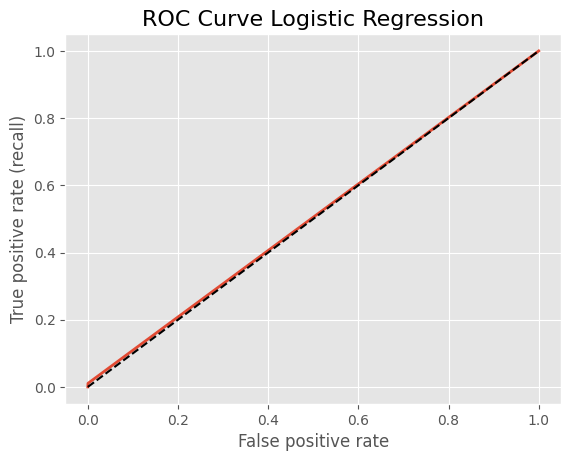

In [ ]:
# Plot example ROC curve for best (oversampled) model
fpr, tpr, thresholds = roc_curve(train_df_labels, log_reg_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.title("ROC Curve Logistic Regression", fontsize=16)
plt.xlabel("False positive rate", fontsize=12)
plt.ylabel("True positive rate (recall)", fontsize=12)
plt.show()

### Model 2: SGD Classifier Model

#### Model 2: Original Data set

In [ ]:
# Train SGD classifier model and obtain performance metrics
sgd_clf = SGDClassifier(random_state=42, loss='log_loss')
sgd_clf.fit(train_df_features, train_df_labels)
sgd_labels_pred = cross_val_predict(sgd_clf, train_df_features, train_df_labels, cv=3)
sgd_scores = cross_val_predict(sgd_clf, train_df_features, train_df_labels, cv=3, method="decision_function")

accuracy_sgd = accuracy_score(train_df_labels, sgd_labels_pred)
precision_sgd = precision_score(train_df_labels, sgd_labels_pred)
recall_sgd = recall_score(train_df_labels, sgd_labels_pred)
f1_sgd = f1_score(train_df_labels, sgd_labels_pred)
roc_sgd = roc_auc_score(train_df_labels, sgd_labels_pred)

print("Accuracy:", accuracy_sgd, "Precision:", precision_sgd, "Recall:", recall_sgd, "F1:", f1_sgd, "ROC:", roc_sgd)

Accuracy: 0.9976132780234473 Precision: 0.0 Recall: 0.0 F1: 0.0 ROC: 0.4998765206256288


#### Model 2: Oversampling and Undersampling

In [ ]:
# Obtain mean performance metrics and prediction values for oversampling
predictions_sgd_over, scores_sgd_over = oversampleCrossValidation(train_df_features, train_df_labels, sgd_clf)
scores_sgd_over

{'fit_time': 216.43521614074706,
 'score_time': 0.17920985221862792,
 'test_roc_auc': 0.5566114501456982,
 'test_accuracy': 0.7408341794727368,
 'test_f1': 0.010773345448979841,
 'test_recall': 0.31496225120109816,
 'test_average_precision': 0.006576873290211387}

In [ ]:
# Obtain mean performance metrics and prediction values for undersampling
predictions_sgd_under, scores_sgd_under = undersampleCrossValidation(train_df_features, train_df_labels, sgd_clf)
scores_sgd_under

### Model 3: Naive Bayes Model


#### Model 3: Original Data Set

In [ ]:
# Train Naive Bayes classifier model and obtain performance metrics
clfG = GaussianNB()
clfG_pred = cross_val_predict(clfG, train_df_features, train_df_labels, cv=3)

accuracy_clfG = accuracy_score(train_df_labels, clfG_pred)
precision_clfG = precision_score(train_df_labels, clfG_pred)
recall_clfG = recall_score(train_df_labels, clfG_pred)
f1_clfG = f1_score(train_df_labels, clfG_pred)
roc_clfG = roc_auc_score(train_df_labels, clfG_pred)

print("Accuracy:", accuracy_clfG, "Precision:", precision_clfG, "Recall:", recall_clfG, "F1:", f1_clfG, "ROC:", roc_clfG)

Accuracy: 0.9950622692569218 Precision: 0.06025824964131994 Recall: 0.08955223880597014 F1: 0.07204116638078903 ROC: 0.5432783603249645


#### Model 3: Oversampling and Undersampling

In [ ]:
# Obtain mean performance metrics and prediction values for oversampling
predictions_clfG_over, scores_clfg_over = oversampleCrossValidation(train_df_features, train_df_labels, clfG)
scores_clfg_over

In [ ]:
# Obtain mean performance metrics and prediction values for undersampling
predictions_clfG_under, scores_clfg_under = undersampleCrossValidation(train_df_labels, train_df_labels, clfG)
scores_clfg_under

NameError: ignored

In [ ]:
generate_pickle_from_results(clfG_pred, scores_clfg_over, predictions_clfG_over, scores_clfg_under, predictions_clfG_under)

### Model 4: Random Forest Classifier

#### Model 4: Original Data set

In [ ]:
# Train random forest classifier model and obtain performance metrics
forest_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
forest_classifier.fit(train_df_features, train_df_labels)
forest_predictions = cross_val_predict(forest_classifier, train_df_features, train_df_labels, cv=3)

accuracy_forest = accuracy_score(train_df_labels, forest_predictions)
precision_forest = precision_score(train_df_labels, forest_predictions)
recall_forest = recall_score(train_df_labels, forest_predictions)
f1_forest = f1_score(train_df_labels, forest_predictions)
roc_auc_forest = roc_auc_score(train_df_labels, forest_predictions)

print("Accuracy:", accuracy_forest, "Precision:", precision_forest, "Recall:", recall_forest, "F1:", f1_forest, "ROC-AUC:", roc_auc_forest)

#### Model 4: Oversampling and Undersampling

In [ ]:
# Obtain mean performance metrics and prediction values for oversampling
predictions_forest_over, scores_forest_over = oversampleCrossValidation(train_df_features, train_df_labels, forest_classifier)
scores_forest_over

(array([0, 0, 0, ..., 1, 1, 1]),
 {'fit_time': 306.76201491355897,
  'score_time': 1.5764350414276123,
  'test_roc_auc': 0.5443031804981415,
  'test_accuracy': 0.8064575711932858,
  'test_f1': 0.01743413228224915,
  'test_recall': 0.17405628002745366,
  'test_average_precision': 0.005917271014103429})

In [ ]:
# Obtain mean performance metrics and prediction values for undersampling
predictions_forest_under, scores_forest_under = undersampleCrossValidation(train_df_features, train_df_labels, forest_classifier)
scores_forest_under

### Model 5: Gradient Boosting Classifier

#### Model 5: Hyperparameter Tuning

In [ ]:
# Create a GradientBoostingClassifier object with default parameters
gb_classifier = GradientBoostingClassifier()

# Fit the classifier to your training data
gb_classifier.fit(train_df_features, train_df_labels)

# Define the grid of hyperparameters to search over
param_grid = {'n_estimators': [50, 100, 200, 500]}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)

# Fit the GridSearchCV object to your training data
grid_search.fit(train_df_features, train_df_labels)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

#### Model 5: Original Data Set

In [ ]:
# Train the Gradient Boosting classifier model with best parameters and obtain performance metrics
gb_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_classifier.fit(train_df_features, train_df_labels)
gb_predictions = cross_val_predict(gb_classifier, train_df_features, train_df_labels, cv=3)

accuracy_gb = accuracy_score(train_df_labels, gb_predictions)
precision_gb = precision_score(train_df_labels, gb_predictions)
recall_gb = recall_score(train_df_labels, gb_predictions)
f1_gb = f1_score(train_df_labels, gb_predictions)
roc_auc_gb = roc_auc_score(train_df_labels, gb_predictions)

print("Accuray:", accuracy_gb, "Precision:", precision_gb, "Recall:", recall_gb, "F1:", f1_gb, "ROC-AUC:", roc_auc_gb)

GradientBoostingClassifier(n_estimators=50, random_state=42)

#### Model 5: Oversampling and Undersampling

In [ ]:
# Obtain mean performance metrics and prediction values for oversampling
predictions_gb_over, scores_gb_over = oversampleCrossValidation(train_df_features, train_df_labels, gb_classifier)
scores_gb_over

(array([0, 0, 0, ..., 0, 0, 1]),
 {'fit_time': 530.1520631790161,
  'score_time': 0.2687835693359375,
  'test_roc_auc': 0.7837549473307637,
  'test_accuracy': 0.8784323612989177,
  'test_f1': 0.01870924513912948,
  'test_recall': 0.5415694349119194,
  'test_average_precision': 0.02917023371474029})

In [ ]:
# Obtain mean performance metrics and prediction values for undersampling
predictions_gb_under, scores_gb_under = undersampleCrossValidation(train_df_features, train_df_labels, gb_classifier)
scores_gb_under

### Model 6: Decision Tree Classifier

#### Model 6: Original Data set

In [ ]:
# Train decision tree model and obtain performance metrics
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(train_df_features, train_df_labels)
tree_predictions = cross_val_predict(decision_tree, train_df_features, train_df_labels, cv=3)

accuracy_tree = accuracy_score(train_df_labels, tree_predictions)
precision_tree = precision_score(train_df_labels, tree_predictions)
recall_tree = recall_score(train_df_labels, tree_predictions)
f1_tree = f1_score(train_df_labels, tree_predictions)
roc_auc_tree = roc_auc_score(train_df_labels, tree_predictions)

print("Accuracy:", accuracy_tree, "Precision:", precision_tree, "Recall:", recall_tree, "F1:", f1_tree, "ROC:", roc_auc_tree)

#### Model 6: Oversampling and Undersampling

In [ ]:
# Obtain mean performance metrics and prediction values for oversampling
predictions_tree_over, scores_tree_over = oversampleCrossValidation(train_df_features, train_df_labels, decision_tree)
scores_tree_over

(array([0, 1, 0, ..., 0, 0, 0]),
 {'fit_time': 8.709675598144532,
  'score_time': 0.10418176651000977,
  'test_roc_auc': 0.6971502222319038,
  'test_accuracy': 0.9027650590135148,
  'test_f1': 0.018438493937330158,
  'test_recall': 0.4263097689315946,
  'test_average_precision': 0.006238984282417465})

In [ ]:
# Obtain mean performance metrics and prediction values for undersampling
predictions_tree_under, scores_tree_under = undersampleCrossValidation(train_df_features, train_df_labels, decision_tree)
scores_tree_under

### Model 7: K-Nearest Neighbours

#### Model 7: Original Data Set

In [ ]:
# Train KNN model and obtain performance metrics
neigh = KNeighborsClassifier()
neigh_predictions = cross_val_predict(neigh, train_df_features, train_df_labels, cv=3)

accuracy_neigh = accuracy_score(train_df_labels, neigh_predictions)
precision_neigh = precision_score(train_df_labels, neigh_predictions)
recall_neigh = recall_score(train_df_labels, neigh_predictions)
f1_neigh = f1_score(train_df_labels, neigh_predictions)
roc_auc_neigh = roc_auc_score(train_df_labels, neigh_predictions)

print("Accuracy:", accuracy_neigh, "Precision:", precision_neigh, "Recall:", recall_neigh, "F1:", f1_neigh, "ROC:", roc_auc_neigh)

#### Model 7: Parameter Tuning for KNN

In [ ]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=neigh, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(train_df_features, train_df_labels)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### Model 7: Oversampling and Undersampling

In [ ]:
# Obtain mean performance metrics and prediction values for oversampling
predictions_neigh_over, scores_neigh_over = oversampleCrossValidation(train_df_features, train_df_labels, neigh)
scores_neigh_over

(array([0, 0, 0, ..., 1, 1, 1]),
 {'fit_time': 1.2912076473236085,
  'score_time': 393.0528742790222,
  'test_roc_auc': 0.383538637659555,
  'test_accuracy': 0.4116460688067153,
  'test_f1': 0.0019324198715829361,
  'test_recall': 0.3553191489361702,
  'test_average_precision': 0.0019625420899129463})

In [ ]:
# Obtain mean performance metrics and prediction values for undersampling
predictions_neigh_under, scores_neigh_under = undersampleCrossValidation(train_df_features, train_df_labels, neigh)
scores_neigh_under

## Part 4: Assess and Evaluate the Models

### Task 4.1: Plot P-R and ROC Curves for All Models

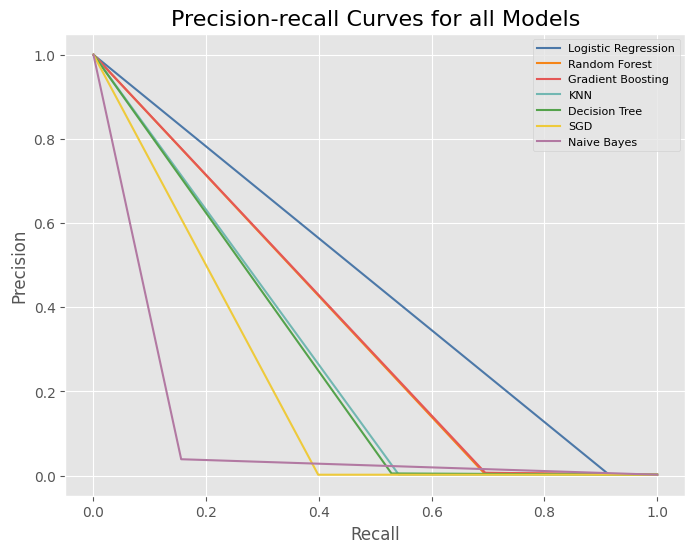

In [ ]:
# Compute precision-recall curves for each of the models
precision7, recall7, _ = precision_recall_curve(df_labels, predictions_clfG_under)
precision6, recall6, _ = precision_recall_curve(df_labels, predictions_sgd_under)
precision1, recall1, _ = precision_recall_curve(df_labels, predictions_log_under)
precision4, recall4, _ = precision_recall_curve(df_labels, predictions_neigh_under)
precision2, recall2, _ = precision_recall_curve(df_labels, predictions_forest_under)
precision5, recall5, _ = precision_recall_curve(df_labels, predictions_tree_under)
precision3, recall3, _ = precision_recall_curve(df_labels, predictions_gb_under)

# Plot the precision-recall curves
sns.set_palette(['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B', '#B279A2'])
plt.figure(figsize=(8,6))
plt.plot(recall1, precision1, color=sns.color_palette()[0], label='Logistic Regression')
plt.plot(recall2, precision2, color=sns.color_palette()[1], label='Random Forest')
plt.plot(recall3, precision3, color=sns.color_palette()[2], label='Gradient Boosting')
plt.plot(recall4, precision4, color=sns.color_palette()[3], label='KNN')
plt.plot(recall5, precision5, color=sns.color_palette()[4], label='Decision Tree')
plt.plot(recall6, precision6, color=sns.color_palette()[5], label='SGD')
plt.plot(recall7, precision7, color=sns.color_palette()[6], label='Naive Bayes')
plt.title("Precision-recall Curves for all Models", fontsize=16)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(fontsize=8)
plt.show()

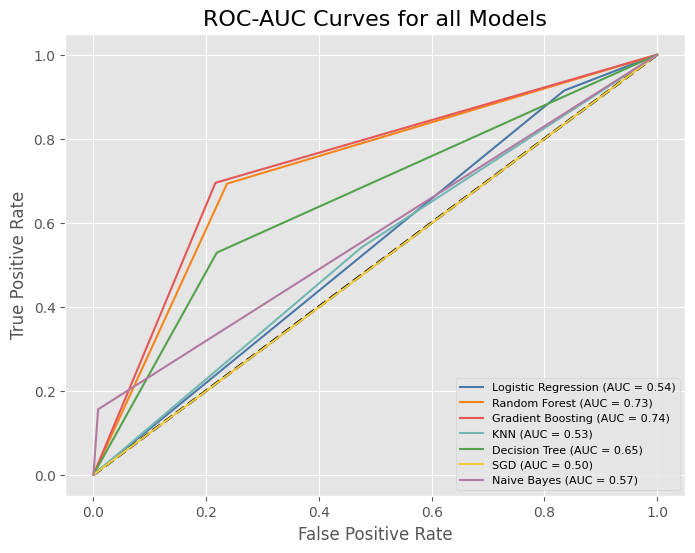

In [ ]:
# Plot ROC-AUC curves for all models
## List of model prediction arrays
model_predictions = [predictions_log_under, predictions_forest_under, predictions_gb_under, predictions_neigh_under, 
                     predictions_tree_under, predictions_sgd_under, predictions_clfG_under]

## List of model names
model_names = ['Logistic Regression','Random Forest','Gradient Boosting','KNN', 'Decision Tree', 'SGD','Naive Bayes']

## Initialize plot
plt.figure(figsize=(8,6))
plt.title('ROC-AUC Curves for all Models', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Get list of colors
colors = sns.color_palette(['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B', '#B279A2'])

## Plot the random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color="black")

## Loop through each model and plot its ROC-AUC curve
for i in range(len(model_predictions)):
    fpr, tpr, _ = roc_curve(df_labels, model_predictions[i])
    roc_auc = roc_auc_score(df_labels, model_predictions[i])
    plt.plot(fpr, tpr, color=colors[i], label='{} (AUC = {:.2f})'.format(model_names[i], roc_auc))

## Add legend and show plot
plt.legend(loc='lower right', fontsize=8)
plt.show()

### Task 4.2: Obtain Feature Importances for the Best Model

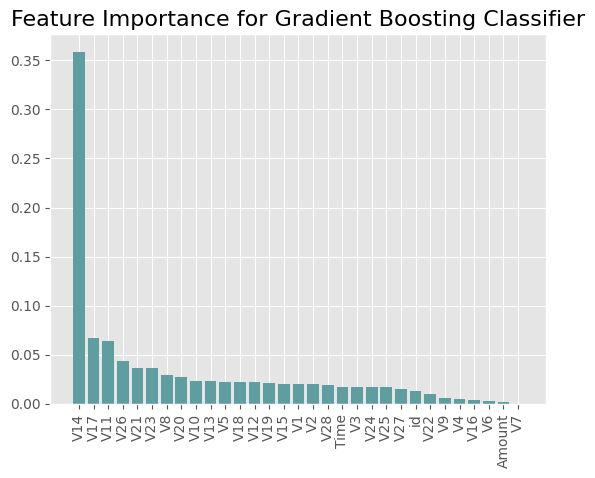

In [ ]:
# Get feature importances
importances = gb_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train_df_features.columns[i] for i in indices]

# Create plot
plt.figure()
plt.title("Feature Importance for Gradient Boosting Classifier", fontsize=16)
plt.bar(range(train_df_features.shape[1]), importances[indices], color="cadetblue")
plt.xticks(range(train_df_features.shape[1]), names, rotation=90)
plt.show()

- Clearly V14 has a strong impact for the Gradient Boosting Classifier, whether there is fraud or not. 

Please see attached report for recommendations to our client on how to implement these models in practice and predict credit card fraud in their business.

## Create Kaggle Submissions

For Kaggle submissions, we will use Naive Bayes and Gradient Boosting classifiers

In [ ]:
# Standardise 'Amount' and 'Time' variables
data_to_scale_train = train_df[['Time', 'Amount']]
data_to_scale_test = test_df[['Time', 'Amount']]

# Scale the data
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(data_to_scale)
scaled_data_test = scaler.fit_transform(data_to_scale_test)

# Replace the original 'Time' and 'Amount' columns with the scaled values
train_df[['Time', 'Amount']] = scaled_data_train
test_df[['Time', 'Amount']] = scaled_data_test

# Shuffle the data
train_df = shuffle(train_df)

# Split the data into labels and features
train_df_labels = train_df["Class"].copy()
train_df_features = train_df.drop("Class", axis=1)

In [ ]:
# Conduct SMOTE on the training set
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
train_df_features, train_df_labels = oversample.fit_resample(train_df_features, train_df_labels)

In [ ]:
# Build the Naive Bayes classifier model with best parameters and make predictions
clfG = GaussianNB()
clfG.fit(train_df_features, train_df_labels)
nbpredictions = clfG.predict_proba(test_df)

In [ ]:
# Naive Bayes classifier model results
column_values = ['number', 'Class']

df = pd.DataFrame(data = nbpredictions, columns = column_values)
df['id'] = test_df['id']
df = df.drop(columns=['number'])
df = df.iloc[:, [1, 0]]
df

,id,Class
0,219129,0.089088
1,219130,0.052535
2,219131,0.049250
3,219132,0.068652
4,219133,0.074346
...,...,...
146082,365211,0.120848
146083,365212,0.121463
146084,365213,0.198799
146085,365214,0.122487


In [ ]:
# Export Naive Bayes model results
df.to_csv('nbresults.csv', index=False)

In [ ]:
# Build the Gradient Boosting classifier model with best parameters and make predictions
gb_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_classifier.fit(train_df_features, train_df_labels)
gbpredictions = gb_classifier.predict_proba(test_df)

In [ ]:
# Gradient Boosting classifier model results
column_values = ['number', 'Class']

df = pd.DataFrame(data = gbpredictions, columns = column_values)
df['id'] = test_df['id']
df = df.drop(columns=['number'])
df = df.iloc[:, [1, 0]]
df

,id,Class
0,219129,0.373675
1,219130,0.210379
2,219131,0.170394
3,219132,0.248542
4,219133,0.278861
...,...,...
146082,365211,0.359935
146083,365212,0.528582
146084,365213,0.542667
146085,365214,0.162648


In [ ]:
# Export Gradient Boosting model results
df.to_csv('gbresults.csv', index=False)

- Please see our report for the presentation and discussion of our results and solution.